# Titanic - Machine Learning from Disaster

Isha Singh


Professor Irene Tsapara


MSDS 422 Practical Machine Learning 


2 February 2025

File Load In

In [236]:
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [169]:
import numpy as np

In [170]:
import matplotlib.pyplot as plt

In [171]:
import seaborn as sns

In [172]:
import pandas as pd

SECTION 01: Descriptive Statistics

TRAINING DATA

In [173]:
titanic_train_dataframe=pd.read_csv("/Users/isingh/Desktop/titanic/train.csv")

TESTING DATA

In [174]:
titanic_test_dataframe=pd.read_csv("/Users/isingh/Desktop/titanic/test.csv")

In [175]:
titanic_test_dataframe.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [176]:
titanic_train_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [177]:
missing_values = titanic_train_dataframe.isnull().sum()

In [178]:
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Outlier

In [179]:
titanic_train_dataframe['Age'].fillna(titanic_train_dataframe['Age'].median(), inplace=True)


/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_10058/2219488372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train_dataframe['Age'].fillna(titanic_train_dataframe['Age'].median(), inplace=True)


In [180]:

titanic_train_dataframe['Cabin'].fillna('Unknown', inplace=True)
titanic_train_dataframe['Embarked'].fillna(titanic_train_dataframe.groupby('Pclass')['Embarked'].transform(lambda x: x.mode().iloc[0]), inplace=True)


/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_10058/2013883459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train_dataframe['Cabin'].fillna('Unknown', inplace=True)
/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_10058/2013883459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

Title

In [181]:
titanic_train_dataframe['Title'] = titanic_train_dataframe['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Family Size

In [182]:
titanic_train_dataframe['FamilySize'] = titanic_train_dataframe['SibSp'] + titanic_train_dataframe['Parch'] + 1


Whether a family member was alone or not

In [183]:
titanic_train_dataframe['IsAlone'] = (titanic_train_dataframe['FamilySize'] == 1).astype(int)


Feature Scaling

In [184]:
from sklearn.preprocessing import StandardScaler


In [185]:
scaler = StandardScaler()
titanic_train_dataframe[['Age', 'Fare']] = scaler.fit_transform(titanic_train_dataframe[['Age', 'Fare']])


In [186]:
titanic_train_dataframe.duplicated().sum()


np.int64(0)

In [187]:
missing_values = titanic_train_dataframe.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
dtype: int64


Outlier IQR

In [188]:
titanic_train_dataframe


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.565736,1,0,A/5 21171,-0.502445,Unknown,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663861,1,0,PC 17599,0.786845,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.258337,0,0,STON/O2. 3101282,-0.488854,Unknown,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,1,0,113803,0.420730,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,0.433312,0,0,373450,-0.486337,Unknown,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.181487,0,0,211536,-0.386671,Unknown,S,Rev,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.796286,0,0,112053,-0.044381,B42,S,Miss,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.104637,1,2,W./C. 6607,-0.176263,Unknown,S,Miss,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.258337,0,0,111369,-0.044381,C148,C,Mr,1,1


In [189]:

numeric_cols = titanic_train_dataframe.select_dtypes(include=[np.number]).columns.tolist()
Q1 = titanic_train_dataframe[numeric_cols].quantile(0.25)
Q3 = titanic_train_dataframe[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
titanic_train_dataframe1 = titanic_train_dataframe[~((titanic_train_dataframe[numeric_cols] < lower_bound) | (titanic_train_dataframe[numeric_cols] > upper_bound)).any(axis=1)]

In [190]:
titanic_train_dataframe1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.565736,1,0,A/5 21171,-0.502445,Unknown,S,Mr,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.258337,0,0,STON/O2. 3101282,-0.488854,Unknown,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,1,0,113803,0.420730,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,0.433312,0,0,373450,-0.486337,Unknown,S,Mr,1,1
5,6,0,3,"Moran, Mr. James",male,-0.104637,0,0,330877,-0.478116,Unknown,Q,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,-0.335187,0,0,SOTON/OQ 392076,-0.506472,Unknown,S,Mr,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,-0.181487,0,0,211536,-0.386671,Unknown,S,Rev,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.796286,0,0,112053,-0.044381,B42,S,Miss,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.258337,0,0,111369,-0.044381,C148,C,Mr,1,1


Visualizations - Exploratory Data Analysis

/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_10058/3872080991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Survived', y='Age', data=titanic_train_dataframe1, palette='muted', alpha=0.5, jitter=True)


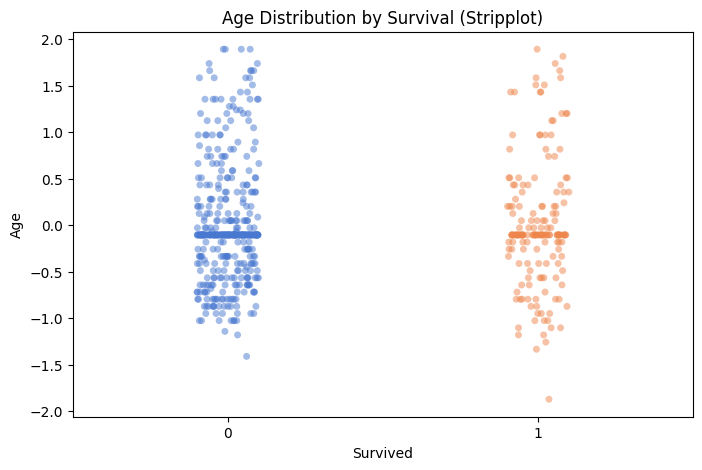

In [191]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='Survived', y='Age', data=titanic_train_dataframe1, palette='muted', alpha=0.5, jitter=True)
plt.title('Age Distribution by Survival (Stripplot)')
plt.show()

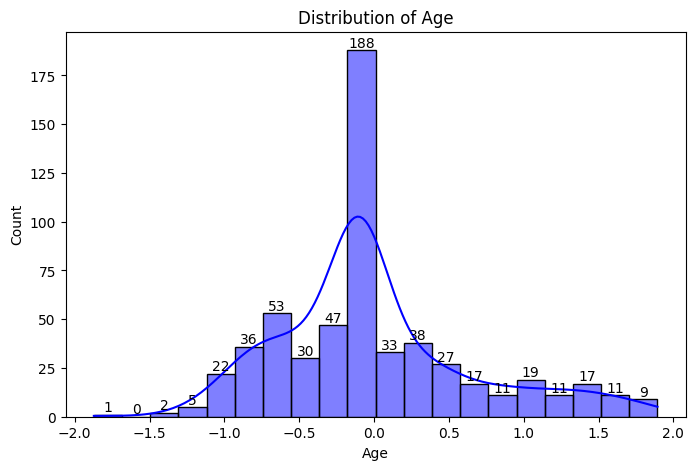

In [192]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_train_dataframe1['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black')
plt.show()


/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_10058/3739617002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_train_dataframe1, palette='coolwarm', estimator=np.mean)


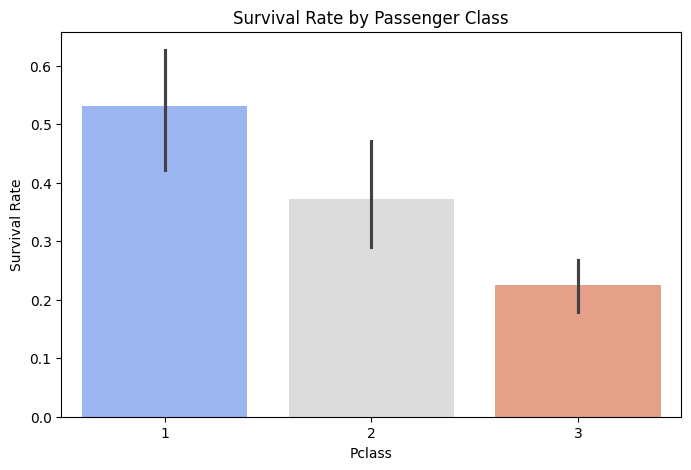

In [193]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic_train_dataframe1, palette='coolwarm', estimator=np.mean)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_10058/2735142903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=titanic_train_dataframe1, palette='coolwarm')


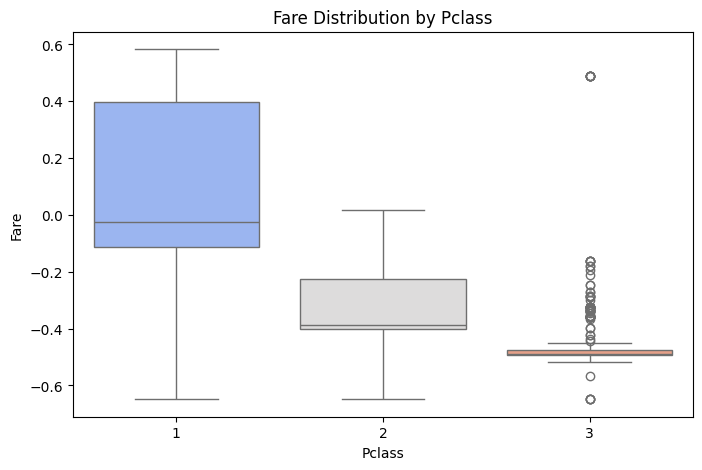

In [194]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=titanic_train_dataframe1, palette='coolwarm')
plt.title('Fare Distribution by Pclass')
plt.show()

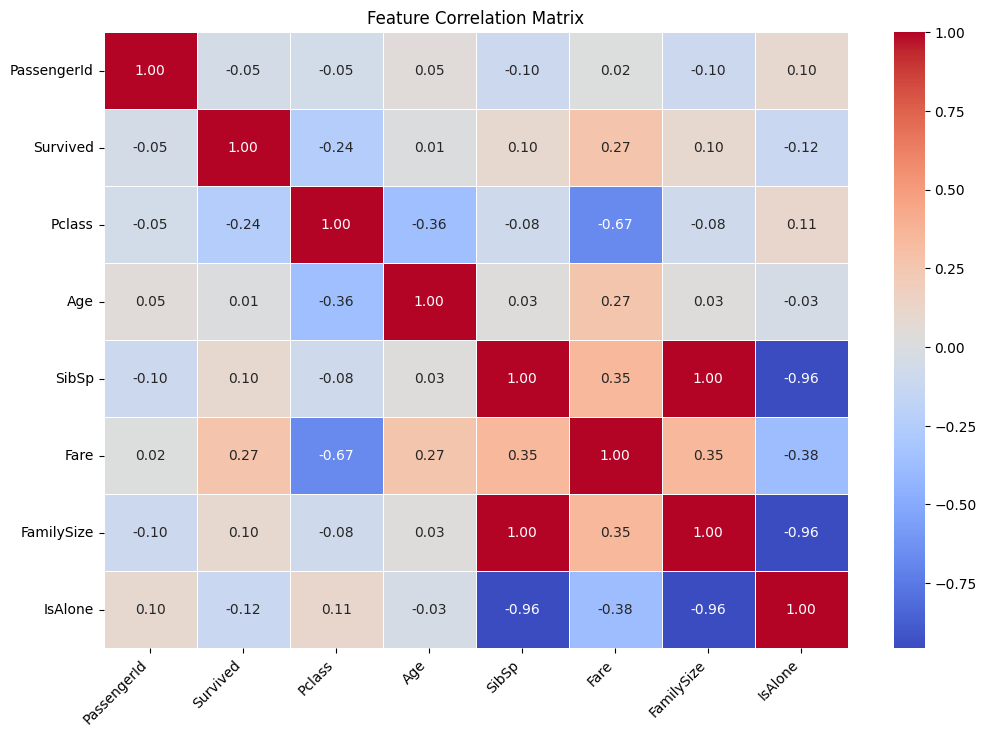

In [195]:
numeric_df = titanic_train_dataframe1.select_dtypes(include=[np.number])
numeric_df = numeric_df.loc[:, (numeric_df.var() > 0)]
plt.figure(figsize=(12, 8))  # Larger figure size
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Feature Correlation Matrix')

plt.show()


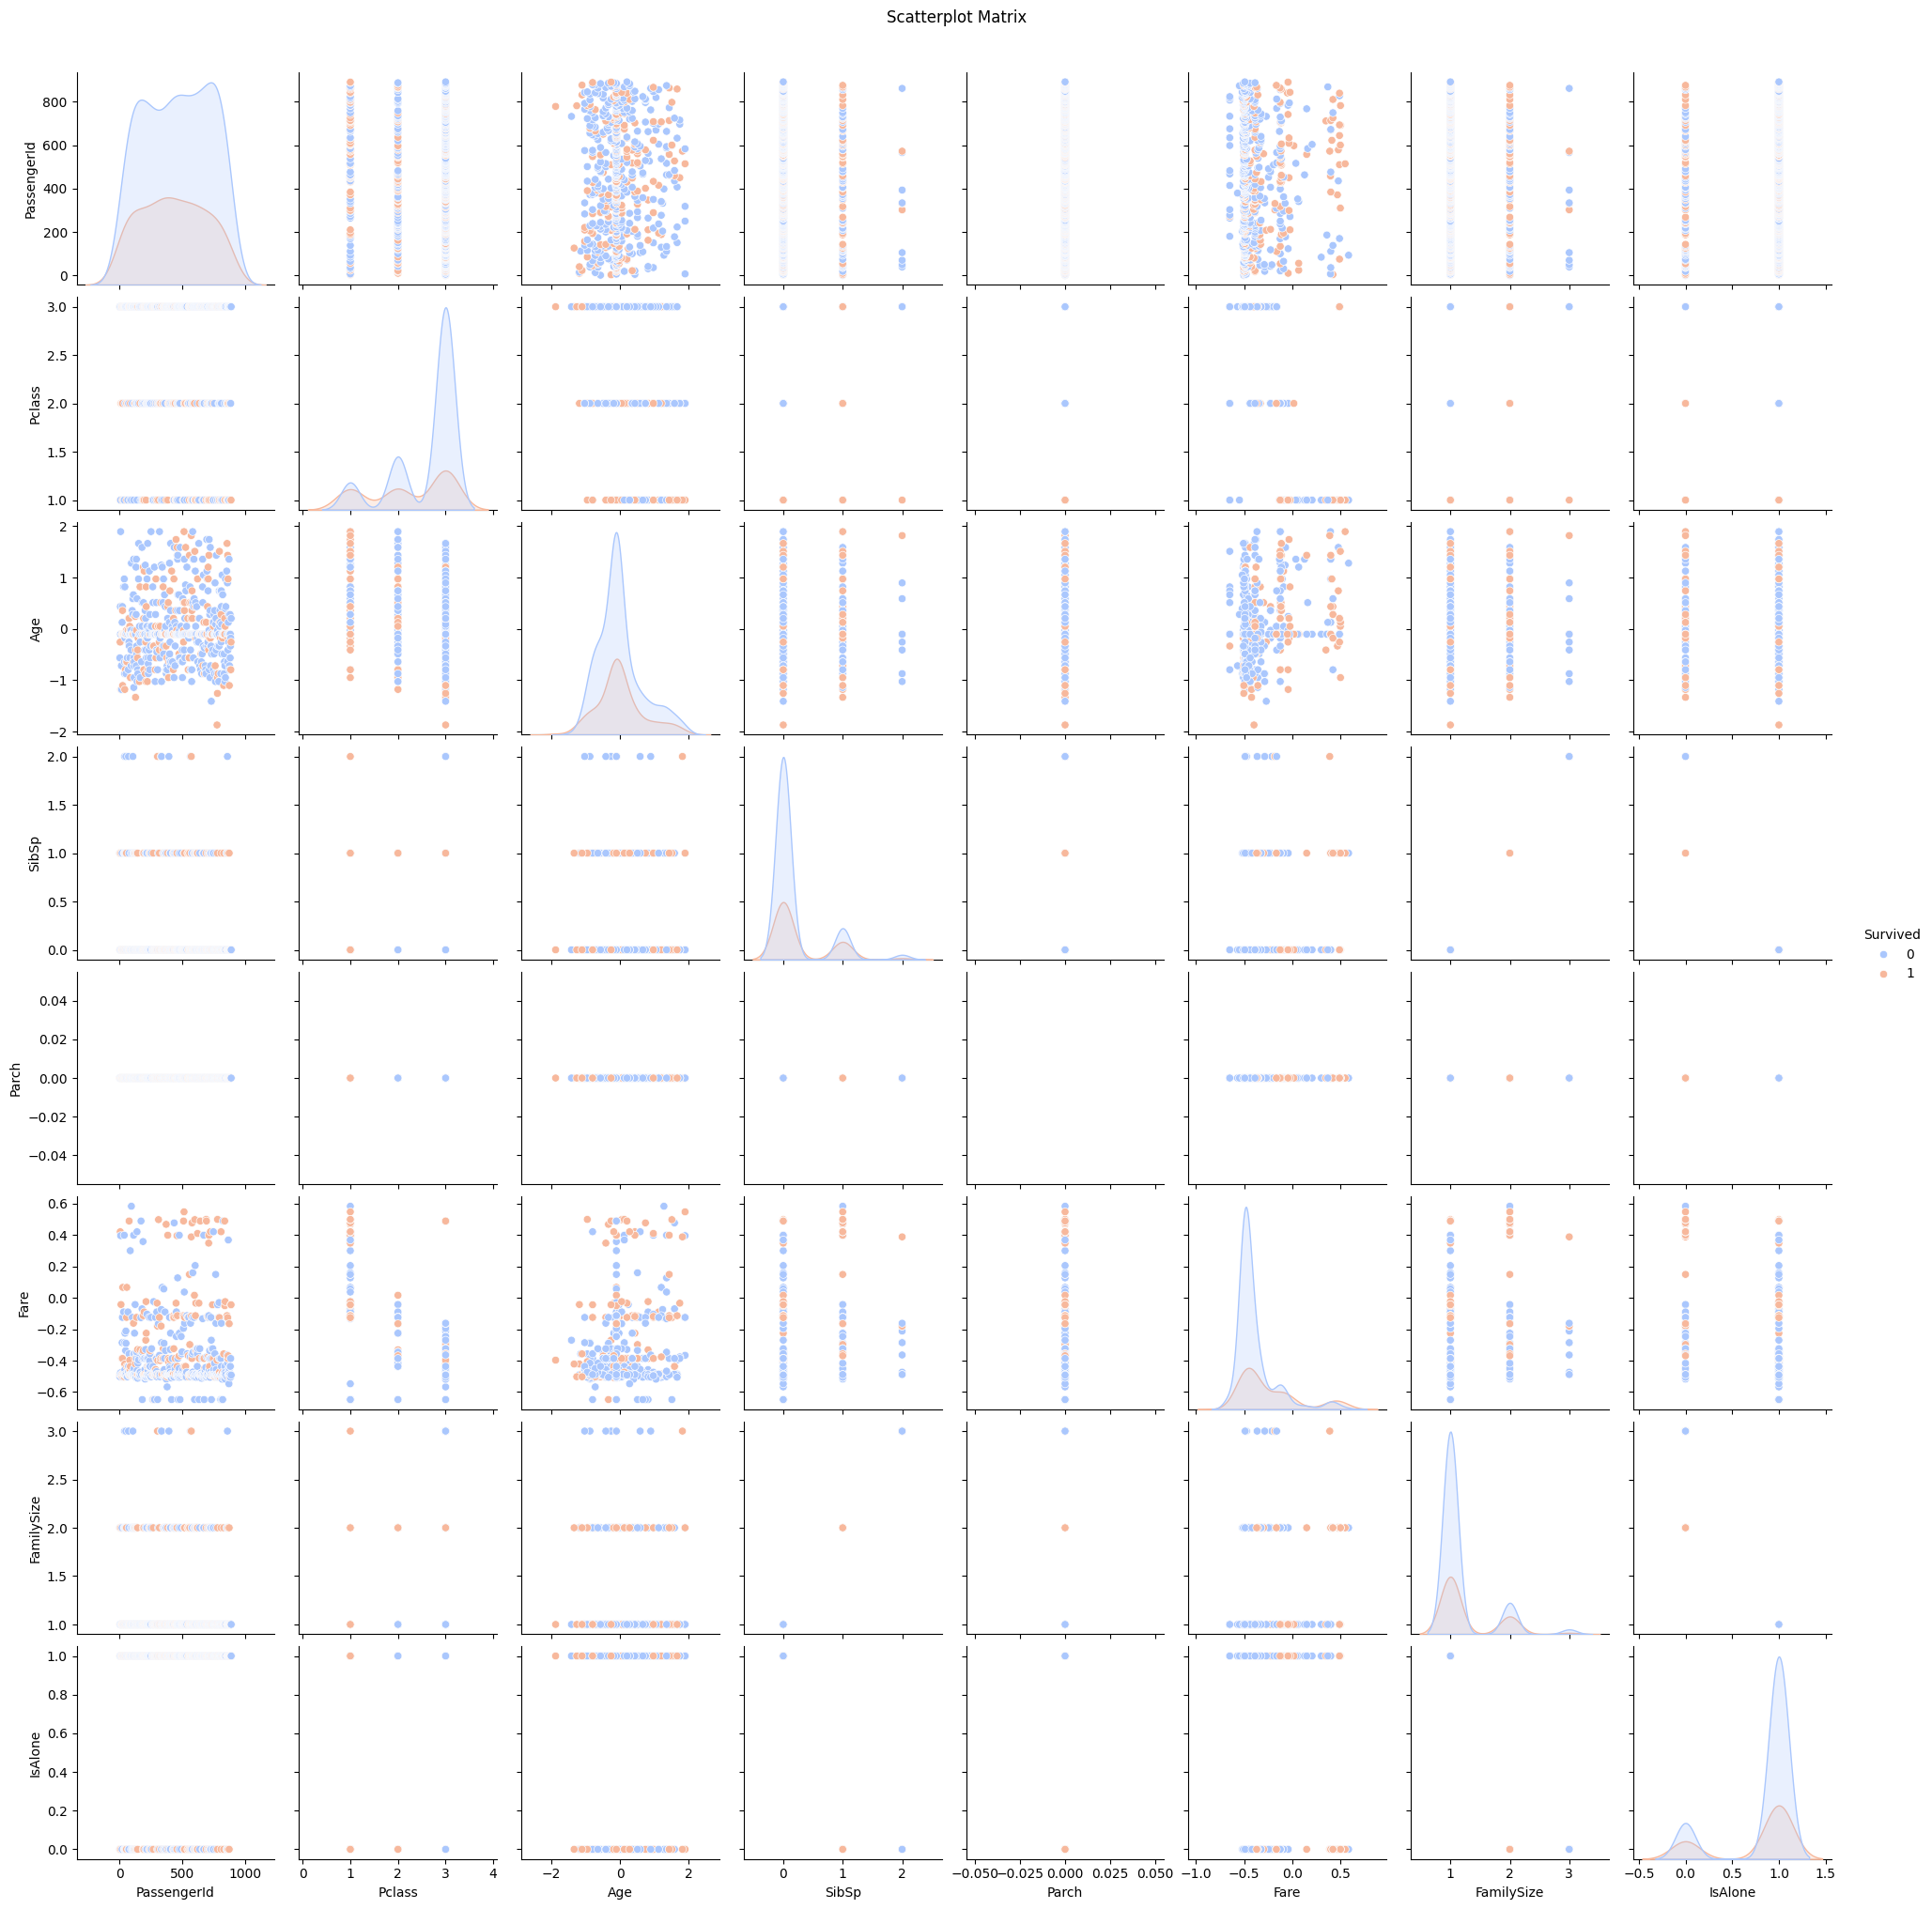

In [196]:
numeric_cols = titanic_train_dataframe1.select_dtypes(include=[np.number])
sns.pairplot(numeric_cols, hue="Survived", palette="coolwarm")
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

In [197]:
print(titanic_train_dataframe1.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
dtype: int64


Train Test Split

In [198]:
from sklearn.model_selection import train_test_split

X = titanic_train_dataframe1.drop(columns=['Survived'])  # Features
y = titanic_train_dataframe1['Survived']  # Target



Cross Validation

In [199]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [200]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

In [201]:
X = X.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], errors='ignore')


In [202]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

In [203]:
print(X.dtypes)
print(X.head())

Pclass              int64
Age               float64
SibSp               int64
Parch               int64
Fare              float64
FamilySize          int64
IsAlone             int64
Sex_male             bool
Embarked_Q           bool
Embarked_S           bool
Title_Dr             bool
Title_Jonkheer       bool
Title_Lady           bool
Title_Major          bool
Title_Master         bool
Title_Miss           bool
Title_Mlle           bool
Title_Mr             bool
Title_Mrs            bool
Title_Ms             bool
Title_Rev            bool
Title_Sir            bool
dtype: object
   Pclass       Age  SibSp  Parch      Fare  FamilySize  IsAlone  Sex_male  \
0       3 -0.565736      1      0 -0.502445           2        0      True   
2       3 -0.258337      0      0 -0.488854           1        1     False   
3       1  0.433312      1      0  0.420730           2        0     False   
4       3  0.433312      0      0 -0.486337           1        1      True   
5       3 -0.104637     

In [204]:
print("Current columns in X:", X.columns)


Current columns in X: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir'],
      dtype='object')


Model Assumptions

KNN 

In [216]:
X

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,2,0,True,False,True
1,1,38.0,1,0,71.2833,2,0,False,False,False
2,3,26.0,0,0,7.9250,1,1,False,False,True
3,1,35.0,1,0,53.1000,2,0,False,False,True
4,3,35.0,0,0,8.0500,1,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,1,True,False,True
887,1,19.0,0,0,30.0000,1,1,False,False,True
888,3,28.0,1,2,23.4500,4,0,False,False,True
889,1,26.0,0,0,30.0000,1,1,True,False,False


/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_10058/2957311614.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_train_dataframe1, palette='coolwarm')


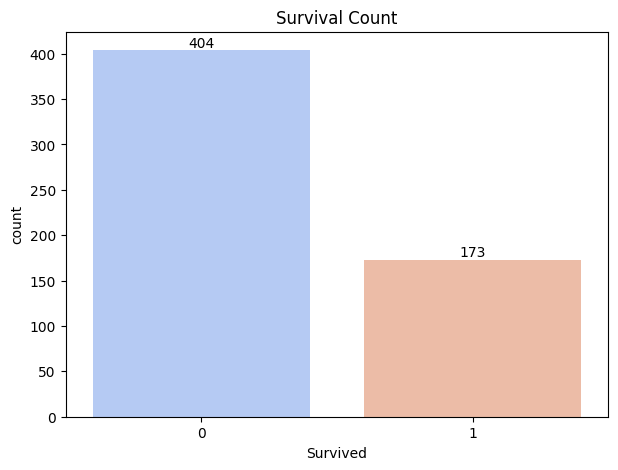

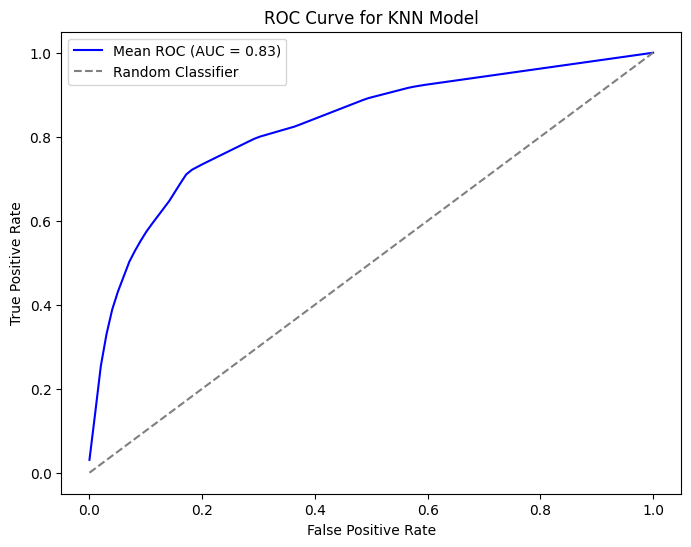

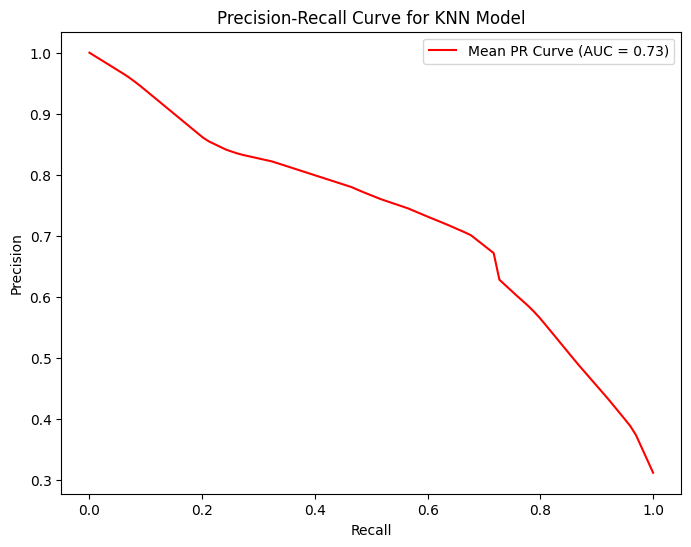

Best Parameters: {'n_neighbors': np.int64(5)}
Mean Accuracy: 0.8069
Mean Precision: 0.7226
Mean Recall: 0.6498
Mean F1 Score: 0.6698
Mean ROC AUC: 0.8266
Submission file 'knn_submission.csv' created. Upload to Kaggle.


In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, precision_recall_curve, auc
)

# Drop unnecessary columns in training data
X = titanic_train_dataframe1.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], errors='ignore')
y = titanic_train_dataframe1['Survived']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

X.fillna(X.median(), inplace=True)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'n_neighbors': np.arange(1, 20)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy', n_jobs=1)  # FIX: n_jobs=1
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_

accuracies, precisions, recalls, f1_scores, roc_aucs = [], [], [], [], []
tprs, precisions_list = [], []
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

    best_knn.fit(X_train_fold, y_train_fold)
    y_pred = best_knn.predict(X_val)
    y_probs = best_knn.predict_proba(X_val)[:, 1]

    accuracies.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred, zero_division=1))
    recalls.append(recall_score(y_val, y_pred, zero_division=1))
    f1_scores.append(f1_score(y_val, y_pred, zero_division=1))
    roc_aucs.append(roc_auc_score(y_val, y_probs))

    fpr, tpr, _ = roc_curve(y_val, y_probs)
    tprs.append(np.interp(mean_fpr, fpr, tpr))

    precision, recall, _ = precision_recall_curve(y_val, y_probs)
    precisions_list.append(np.interp(mean_fpr, recall[::-1], precision[::-1]))

# Compute mean ROC and PR AUC
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
mean_precision = np.mean(precisions_list, axis=0)
mean_pr_auc = auc(mean_fpr, mean_precision)

plt.figure(figsize=(7, 5))
sns.countplot(x='Survived', data=titanic_train_dataframe1, palette='coolwarm')
plt.title('Survival Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', label=f"Mean ROC (AUC = {mean_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Model")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_precision, color='r', label=f"Mean PR Curve (AUC = {mean_pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for KNN Model")
plt.legend()
plt.show()

# Print Model Performance Metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.4f}")
print(f"Mean ROC AUC: {np.mean(roc_aucs):.4f}")

titanic_test_dataframe = pd.read_csv("/Users/isingh/Desktop/titanic/test.csv")

# Store PassengerId separately for submission
passenger_ids = titanic_test_dataframe["PassengerId"]

X_kaggle = titanic_test_dataframe.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')

# One-hot encode categorical variables in test data
X_kaggle = pd.get_dummies(X_kaggle, drop_first=True)

missing_cols = set(X_train.columns) - set(X_kaggle.columns)
for col in missing_cols:
    X_kaggle[col] = 0  

X_kaggle = X_kaggle[X_train.columns]  

X_kaggle.fillna(X_kaggle.median(), inplace=True)

X_kaggle_scaled = pd.DataFrame(scaler.transform(X_kaggle), columns=X_kaggle.columns)

y_kaggle_preds = best_knn.predict(X_kaggle_scaled)

submission_df = pd.DataFrame({
    "PassengerId": passenger_ids,  
    "Survived": y_kaggle_preds
})

submission_df.to_csv("knn_submission.csv", index=False)
print("Submission file 'knn_submission.csv' created. Upload to Kaggle.")


Logistic Regression

In [239]:

# Multicollinearity Check (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print("VIF Values for Multicollinearity Check:")
print(vif_data.sort_values(by="VIF", ascending=False))


VIF Values for Multicollinearity Check:
           Feature         VIF
2            SibSp         inf
5       FamilySize         inf
15      Title_Miss  177.513865
7         Sex_male  135.483680
17        Title_Mr  117.068989
18       Title_Mrs   99.300740
6          IsAlone   12.850046
10        Title_Dr    6.223599
20       Title_Rev    5.052417
16      Title_Mlle    3.289702
19        Title_Ms    3.271164
12      Title_Lady    3.266631
13     Title_Major    3.023922
4             Fare    2.303734
0           Pclass    2.224417
14    Title_Master    2.042050
11  Title_Jonkheer    2.031291
21       Title_Sir    2.024616
8       Embarked_Q    1.823777
9       Embarked_S    1.729554
1              Age    1.261227
3            Parch         NaN


/Users/isingh/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/isingh/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


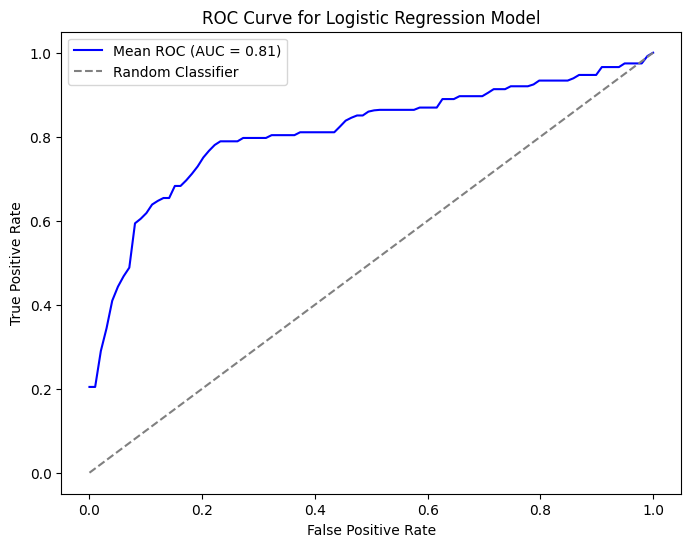

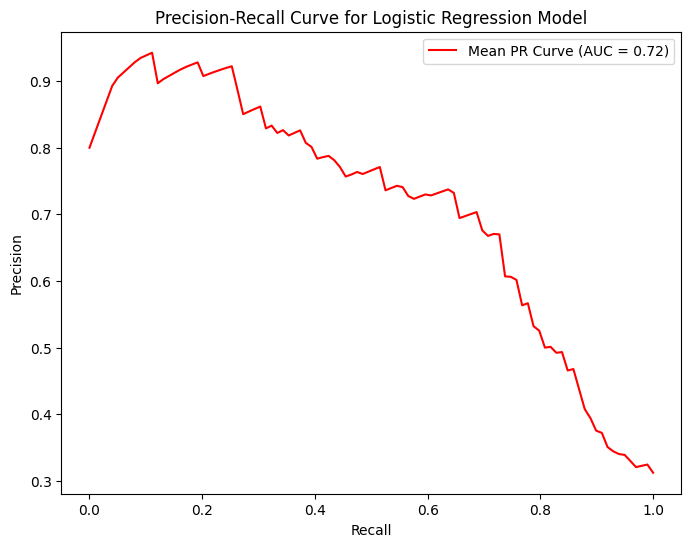

Mean Accuracy: 0.7874
Mean Precision: 0.6917
Mean Recall: 0.6019
Mean F1 Score: 0.6305
Mean ROC AUC: 0.8102
Submission file 'logreg_submission.csv' 


In [224]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=500)
grid_search_logreg = GridSearchCV(logreg, {}, cv=kf, scoring='accuracy', n_jobs=1)  # No hyperparams to tune
grid_search_logreg.fit(X_train, y_train)
best_logreg = grid_search_logreg.best_estimator_

# Model Evaluation
accuracies, precisions, recalls, f1_scores, roc_aucs = [], [], [], [], []
tprs, precisions_list = [], []
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

    best_logreg.fit(X_train_fold, y_train_fold)
    y_pred = best_logreg.predict(X_val)
    y_probs = best_logreg.predict_proba(X_val)[:, 1]

    accuracies.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred, zero_division=1))
    recalls.append(recall_score(y_val, y_pred, zero_division=1))
    f1_scores.append(f1_score(y_val, y_pred, zero_division=1))
    roc_aucs.append(roc_auc_score(y_val, y_probs))

    fpr, tpr, _ = roc_curve(y_val, y_probs)
    tprs.append(np.interp(mean_fpr, fpr, tpr))

    precision, recall, _ = precision_recall_curve(y_val, y_probs)
    precisions_list.append(np.interp(mean_fpr, recall[::-1], precision[::-1]))

# Compute mean ROC and PR AUC
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
mean_precision = np.mean(precisions_list, axis=0)
mean_pr_auc = auc(mean_fpr, mean_precision)



# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', label=f"Mean ROC (AUC = {mean_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_precision, color='r', label=f"Mean PR Curve (AUC = {mean_pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Logistic Regression Model")
plt.legend()
plt.show()

# Print Model Performance Metrics
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.4f}")
print(f"Mean ROC AUC: {np.mean(roc_aucs):.4f}")

titanic_test_dataframe = pd.read_csv("/Users/isingh/Desktop/titanic/test.csv")

# Store PassengerId separately for submission
passenger_ids = titanic_test_dataframe["PassengerId"]

X_kaggle = titanic_test_dataframe.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')

X_kaggle = pd.get_dummies(X_kaggle, drop_first=True)

missing_cols = set(X_train.columns) - set(X_kaggle.columns)
for col in missing_cols:
    X_kaggle[col] = 0  

X_kaggle = X_kaggle[X_train.columns]  

X_kaggle.fillna(X_kaggle.median(), inplace=True)

X_kaggle_scaled = pd.DataFrame(scaler.transform(X_kaggle), columns=X_kaggle.columns)

y_kaggle_preds_logreg = best_logreg.predict(X_kaggle_scaled)

submission_df_logreg = pd.DataFrame({
    "PassengerId": passenger_ids,  
    "Survived": y_kaggle_preds_logreg
})

submission_df_logreg.to_csv("logreg_submission.csv", index=False)
print("Submission file 'logreg_submission.csv' ")

LDA (Linear Discriminant Analysis)

In [241]:
print("\nShapiro-Wilk Normality Test for LDA:")
for col in numerical_cols:
    stat, p = shapiro(X[col])
    print(f"- {col}: p-value={p:.4f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")




Shapiro-Wilk Normality Test for LDA:
- Pclass: p-value=0.0000 (Not Normal)
- Age: p-value=0.0000 (Not Normal)
- SibSp: p-value=0.0000 (Not Normal)
- Parch: p-value=1.0000 (Normal)
- Fare: p-value=0.0000 (Not Normal)
- FamilySize: p-value=0.0000 (Not Normal)
- IsAlone: p-value=0.0000 (Not Normal)


/Users/isingh/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


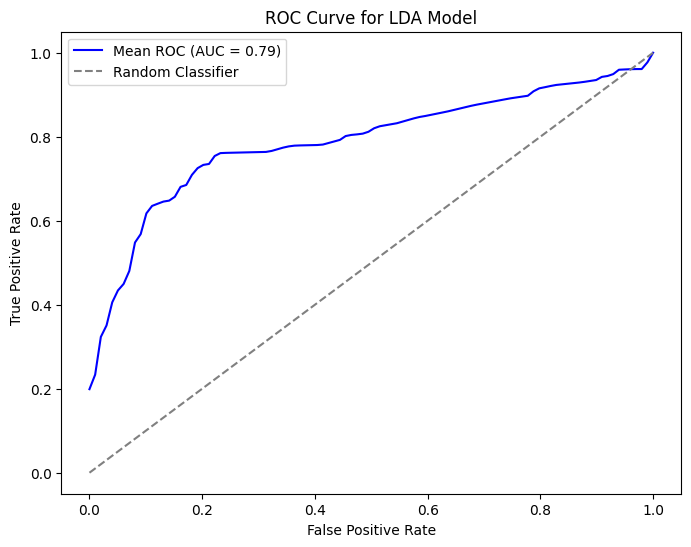

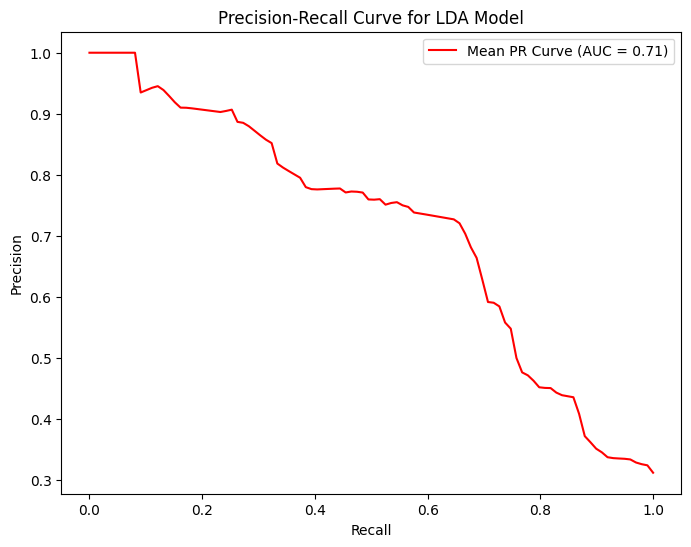

Mean Accuracy: 0.8005
Mean Precision: 0.7178
Mean Recall: 0.6227
Mean F1 Score: 0.6549
Mean ROC AUC: 0.7888
Submission file 'lda_submission.csv' created. Upload to Kaggle.


In [227]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lda = LinearDiscriminantAnalysis()
grid_search_lda = GridSearchCV(lda, {}, cv=kf, scoring='accuracy', n_jobs=1)  # No hyperparameters for LDA
grid_search_lda.fit(X_train, y_train)
best_lda = grid_search_lda.best_estimator_

accuracies, precisions, recalls, f1_scores, roc_aucs = [], [], [], [], []
tprs, precisions_list = [], []
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

    best_lda.fit(X_train_fold, y_train_fold)
    y_pred = best_lda.predict(X_val)
    y_probs = best_lda.predict_proba(X_val)[:, 1]

    accuracies.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred, zero_division=1))
    recalls.append(recall_score(y_val, y_pred, zero_division=1))
    f1_scores.append(f1_score(y_val, y_pred, zero_division=1))
    roc_aucs.append(roc_auc_score(y_val, y_probs))

    fpr, tpr, _ = roc_curve(y_val, y_probs)
    tprs.append(np.interp(mean_fpr, fpr, tpr))

    precision, recall, _ = precision_recall_curve(y_val, y_probs)
    precisions_list.append(np.interp(mean_fpr, recall[::-1], precision[::-1]))

# Compute mean ROC and PR AUC
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
mean_precision = np.mean(precisions_list, axis=0)
mean_pr_auc = auc(mean_fpr, mean_precision)



# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', label=f"Mean ROC (AUC = {mean_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LDA Model")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_precision, color='r', label=f"Mean PR Curve (AUC = {mean_pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for LDA Model")
plt.legend()
plt.show()

# Print Model Performance Metrics
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.4f}")
print(f"Mean ROC AUC: {np.mean(roc_aucs):.4f}")

titanic_test_dataframe = pd.read_csv("/Users/isingh/Desktop/titanic/test.csv")

passenger_ids = titanic_test_dataframe["PassengerId"]

X_kaggle = titanic_test_dataframe.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')

X_kaggle = pd.get_dummies(X_kaggle, drop_first=True)

missing_cols = set(X_train.columns) - set(X_kaggle.columns)
for col in missing_cols:
    X_kaggle[col] = 0  

X_kaggle = X_kaggle[X_train.columns]  

X_kaggle.fillna(X_kaggle.median(), inplace=True)

# Standardize test data
X_kaggle_scaled = pd.DataFrame(scaler.transform(X_kaggle), columns=X_kaggle.columns)

y_kaggle_preds_lda = best_lda.predict(X_kaggle_scaled)

submission_df_lda = pd.DataFrame({
    "PassengerId": passenger_ids,  
    "Survived": y_kaggle_preds_lda
})

submission_df_lda.to_csv("lda_submission.csv", index=False)
print("Submission file 'lda_submission.csv' created. Upload to Kaggle.")